In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
# Créer une série temporelle artificielle
t = np.arange(0, 1000)
x = np.sin(0.01 * t) + np.random.normal(0, 0.1, 1000)
data = pd.DataFrame(x, index=t, columns=['Value'])

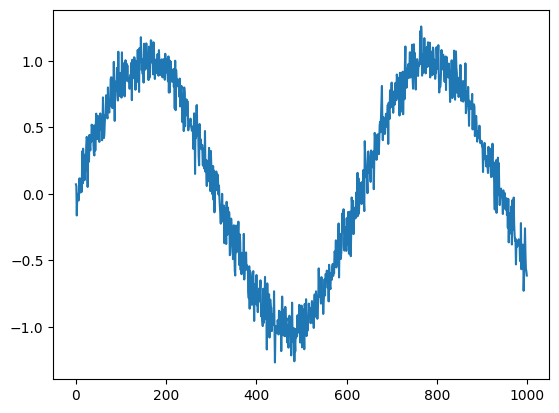

In [42]:
# Visualiser les données avant traiter.On utiliser la bibliothèque matplotlib pour afficher un graphique de la série temporelle :
plt.plot(data)
plt.show()

In [43]:
# Normaliser les données en utilisant un objet MinMaxScaler de la bibliothèque scikit-learn :
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

In [44]:
# Créer des séquences de données d'entrée et de sortie pour entraîner notre réseau de neurones LSTM.On utiliser une fenêtre de temps de n jours pour chaque séquence :
n_days = 30
X = []
y = []
for i in range(n_days, len(data_normalized)):
    X.append(data_normalized[i-n_days:i, 0])
    y.append(data_normalized[i, 0])
X = np.array(X)
y = np.array(y)

In [45]:
# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [46]:
# Créer et entraîner le modèle LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_days, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
25/25 [==============================] - 3s 18ms/step - loss: 0.0678
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0050
Epoch 3/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0027
Epoch 4/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 5/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0024
Epoch 6/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0026
Epoch 7/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 8/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0024
Epoch 9/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0024
Epoch 10/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0023
Epoch 11/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 12/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0023
Epoch 13/100
25/25 [=====

7/7 [==============================] - 0s 8ms/step


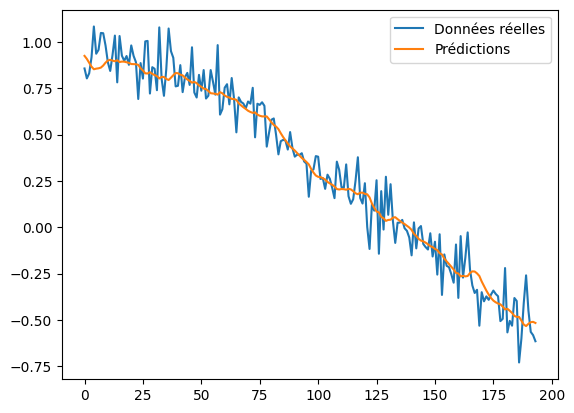

In [48]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Inverser la normalisation des données pour obtenir les valeurs réelles
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualiser les prédictions
plt.plot(y_test, label='Données réelles')
plt.plot(y_pred, label='Prédictions')
plt.legend()
plt.show()